<a href="https://colab.research.google.com/github/prasad4fun/TF-2.0/blob/master/Machine%20Learning%20Basics/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [6]:
type(data)

sklearn.utils.Bunch

In [7]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train Score", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6236 - accuracy: 0.6588 - val_loss: 0.5808 - val_accuracy: 0.6915
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5573 - accuracy: 0.7402 - val_loss: 0.5225 - val_accuracy: 0.7926
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7979 - val_loss: 0.4730 - val_accuracy: 0.8245
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.8530 - val_loss: 0.4313 - val_accuracy: 0.8670
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4148 - accuracy: 0.8661 - val_loss: 0.3963 - val_accuracy: 0.8936
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3823 - accuracy: 0.8766 - val_loss: 0.3663 - val_accuracy: 0.9096
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3542 - accuracy: 0.8924 - val_loss: 0.3412 - val_accuracy: 0.9149
Epoch 8/100
1

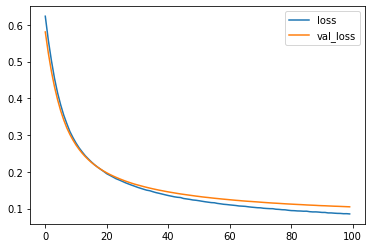

In [18]:
import matplotlib.pyplot as plt
plt.plot (r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

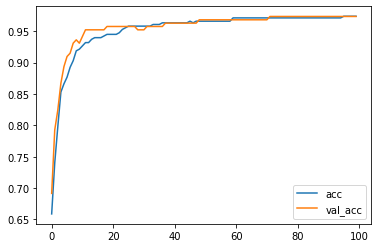

In [19]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [20]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[9.94416595e-01]
 [9.05135393e-01]
 [5.77944815e-02]
 [2.04383433e-02]
 [9.99513388e-01]
 [8.18835497e-02]
 [9.73624229e-01]
 [6.97175622e-01]
 [9.88301754e-01]
 [9.91659284e-01]
 [9.98280823e-01]
 [9.99987483e-01]
 [9.98986959e-01]
 [9.87148464e-01]
 [7.38427579e-01]
 [9.11810517e-01]
 [9.98831153e-01]
 [5.83155959e-08]
 [1.54554844e-04]
 [6.64564252e-01]
 [9.64629412e-01]
 [3.81411046e-01]
 [9.50090647e-01]
 [9.31736469e-01]
 [1.07968152e-02]
 [9.99171674e-01]
 [9.98587012e-01]
 [9.95321631e-01]
 [9.99895871e-01]
 [9.99003053e-01]
 [3.51184607e-03]
 [1.39044317e-07]
 [7.21273422e-01]
 [9.11148667e-01]
 [9.71697211e-01]
 [4.71323729e-04]
 [9.84582603e-02]
 [1.23041868e-03]
 [9.98015642e-01]
 [7.92038045e-05]
 [2.75500651e-12]
 [9.97597575e-01]
 [7.31233597e-01]
 [9.59724069e-01]
 [9.53982413e-01]
 [9.11283314e-01]
 [9.80135441e-01]
 [9.95597839e-01]
 [1.30791386e-06]
 [9.94422078e-01]
 [7.98032045e-01]
 [5.49641845e-06]
 [4.30494547e-04]
 [9.82803822e-01]
 [8.67248595e-01]
 [9.961683

In [21]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


In [22]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.973404255319149
6/6 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9734
Evaluate output: [0.1046600416302681, 0.9734042286872864]


In [0]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [24]:
!ls -lh 

total 24K
-rw-r--r-- 1 root root  19K May  2 12:13 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Apr  3 16:24 sample_data


In [25]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9734


[0.1046600416302681, 0.9734042286872864]

In [0]:
from google.colab import files
files.download('linearclassifier.h5')